In [51]:
import numpy as np
import matplotlib.pyplot as plt

## Systematic method to dervie FDA equations from Taylor Series

There is a more systematic way to derive FDA equations from Taylor series (which includes Euler approximation as well). To make it clear how we can do it, I will cover three examples here. Before going throught the examples, let's consider the following Taylor series expansion.

(1) $f(x-2\Delta x) = f(x) - f'(x)dx + \dfrac{1}{2} f''(x)(2\Delta x)^2 - \dfrac{1}{6}f'''(x)(2\Delta x)^3 + \dfrac{1}{24}f''''(x)(2\Delta x)^4 - \dfrac{1}{120}f'''''(x)(2\Delta x)^5 + O(\Delta x^6)$

(2) $f(x-\Delta x) = f(x) - f'(x)dx + \dfrac{1}{2} f''(x)\Delta x^2 - \dfrac{1}{6}f'''(x)\Delta x^3 + \dfrac{1}{24}f''''(x)\Delta x^4 - \dfrac{1}{120}f'''''(x)\Delta x^5 + O(\Delta x^6)$

(3) $f(x) = f(x)$

(4) $f(x+\Delta x) = f(x) + f'(x)dx + \dfrac{1}{2} f''(x)\Delta x^2 + \dfrac{1}{6}f'''(x)\Delta x^3 + \dfrac{1}{24}f''''(x)\Delta x^4 + \dfrac{1}{120}f'''''(x)\Delta x^5 + O(\Delta x^6)$

(5) $f(x+2\Delta x) = f(x) + f'(x)dx + \dfrac{1}{2} f''(x)(2\Delta x)^2 + \dfrac{1}{6}f'''(x)(2\Delta x)^3 + \dfrac{1}{24}f''''(x)(2\Delta x)^4 +\dfrac{1}{120}f'''''(x)(2\Delta x)^5 + O(\Delta x^6)$

### Example 1: Deriving Euler FDA
 
suppose that we have $f(x+dx)$ and $f(x)$. Now we want to find the coefficients a,b such that:

$af(x+dx) + bf(x) \approx f'(x) $

considering (2),(3) equations we can easily find out that we should have:

i) $a+b=0$

ii)$b = 1/dx $

So we will have:

$\rightarrow a = -1/dx ; b=1/dx$

\begin{equation}
\dfrac{f(x+dx) - f(x)}{dx} = f'(x) + O(\Delta x^1)
\end{equation}



### Example 2: Deriving Second Order approximation


Consider using f(x+dx), f(x), f(x-dx) and derive the FDA eqution for $f''(x)$

$a f(x+dx) + b f(x) + c f(x-dx)$

looking at equations (2)(3)(4), we can easily say that we should have:

$a + b + c = 0$

$-a + c = 0$

$0.5(a+c)\Delta x^2 = 1$


So we will have:

$a = c = \dfrac{1}{\Delta x^2}$

$b = \dfrac{-2}{\Delta x^2}$

So the finite difference approximation for $f''(x)$ will be:

\begin{equation}
\dfrac{f(x+dx) - 2f(x) + f(x-dx)}{(dx)^2} \approx f''(x) + O(\Delta x^2)
\end{equation}



As you can see we can use more and more terms to further decrease the error. But using that method (as well as using the equation derived above) would cause some troubles. That is for using the above formula to calculate the second derivitive of a function, we need to know the value of that function at three points, i.e. n-1,n,n+1. (and if you use even more f(x+-kdx) terms to futher reduce the error, you would need more points to calculate derivitive!).
Using this formula to calculate the derivitive of a known function, this won't lead to any problems. However, if we decide to use this FDA equation to solve differential equations with initial values, we will have troubles. The problems arrises from the fact to use this formula we would need to know the values of $x_0,x_1$ in order to calculate $x_3$ and so on. but as the initial values, we only know the value of $x_0$ and $\dot x(0)$

to calculate the value of $x_1$ we can use some other methods like Euler method. and after calculating that we can use the above formula to calculate the derivitive for other points as well.

### Example: Harmonic Oscillator $\ddot x = -x$

First we need to approximate the second order derivitive with FDA equation:

$\ddot x = \dfrac{x_{i+1} - 2x_{i} + x_{i+1}}{(dx)^2} + O(\Delta x^2)$

$\ddot x = -x$

So:

$\rightarrow \dfrac{x_{i+1} - 2x_{i} + x_{i-1}}{(dx)^2} = -x_i$

\begin{equation}
x_{i+1} = 2x_i - x_{i-1} - x_i \Delta x^2
\end{equation}

$x_0$ = we know as initial value

$\dot x(0)$ = we know as initial value

$x_1 = \dot x(0) \Delta x + x_0$  (Euler approximation of the value of $x_1$. So in this step we would like to decrease $\Delta x$ v a lot to further reduce the amount of errro (note that the errro of Euler approximatation is $O(\Delta x)$

To make more interesting results and outputs, lets consider a two dimentional harmonic oscillator to generate the Lissajous curve

In [53]:
tmax = 50
l = 10
N = np.power(2,l)
dt = tmax/N
x = 0
y = 0
vx = 3
vy = -1
xlist = np.zeros(N)
ylist = np.zeros(N)

kx = 1
ky = 3

x1 = x + vx*dt/10
x_temp = x
x = x1
xpre = x_temp
xlist[0] = xpre
xlist[1] = x

y1 = y + vy*dt/10
y_temp = y
y = y1
ypre = y_temp
ylist[0] = ypre
ylist[1] = y


for i in range(2,N):
    x_temp = x
    x = 2*x - xpre - kx*x*dt**2
    xpre = x_temp
    xlist[i] = x
    
    y_temp = y
    y = 2*y - ypre - ky*y*dt**2
    ypre = y_temp
    ylist[i] = y
    
    
    


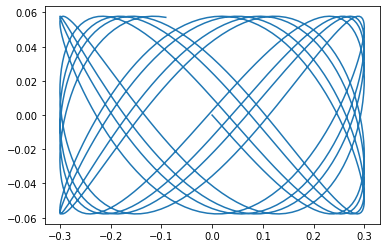

In [54]:
plt.plot(xlist,ylist)

In [55]:
vxlist = (np.roll(xlist,-1) - xlist)/dt
vxlist = vxlist[:-1]

vylist = (np.roll(ylist,-1) - ylist)/dt
vylist = vylist[:-1]

In [56]:
Ex = 0.5*kx*xlist[:-1]**2 + 0.5*vxlist**2

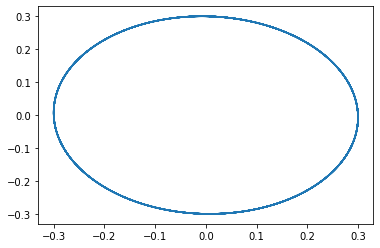

In [57]:
plt.plot(xlist[:-1],vxlist)

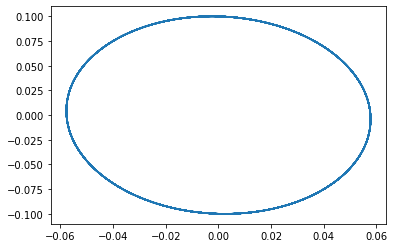

In [58]:
plt.plot(ylist[:-1], vylist)

(0.0, 0.2)

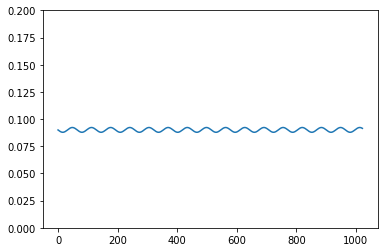

In [59]:
plt.plot(xlist[:-1]**2 + vxlist**2)
plt.ylim([0,0.2])